In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

In [26]:
train_df.head()

,Index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,9710,Resort Hotel,1,122,2016,December,53,27,0,4,...,3,No Deposit,240.0,0,Transient,74.75,0,2,Canceled,2016-11-27
1,40307,City Hotel,1,20,2015,July,30,22,0,2,...,0,No Deposit,1.0,0,Transient-Party,62.00,0,0,Canceled,2015-07-17
2,110051,City Hotel,0,87,2017,April,16,16,2,3,...,0,No Deposit,9.0,0,Transient,171.00,0,0,Check-Out,2017-04-21
3,22999,Resort Hotel,0,0,2017,February,5,2,0,1,...,0,No Deposit,196.0,0,Transient,43.00,0,1,Check-Out,2017-02-03
4,8344,Resort Hotel,1,42,2016,September,39,23,0,1,...,0,No Deposit,240.0,0,Transient,109.00,0,1,Canceled,2016-08-26


In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Index                           83573 non-null  int64  
 1   hotel                           83573 non-null  object 
 2   is_canceled                     83573 non-null  int64  
 3   lead_time                       83573 non-null  int64  
 4   arrival_date_year               83573 non-null  int64  
 5   arrival_date_month              83573 non-null  object 
 6   arrival_date_week_number        83573 non-null  int64  
 7   arrival_date_day_of_month       83573 non-null  int64  
 8   stays_in_weekend_nights         83573 non-null  int64  
 9   stays_in_week_nights            83573 non-null  int64  
 10  adults                          83573 non-null  int64  
 11  children                        83569 non-null  float64
 12  babies                          

In [28]:
train_df.describe()

,Index,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83569.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,72156.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,59781.249710,0.369557,103.913369,2016.156187,27.148301,15.783339,0.927560,2.501310,1.856018,0.103663,0.008125,0.031972,0.087756,0.134673,0.221327,86.570680,2.308042,101.767241,0.062628,0.571177
std,34509.357576,0.482688,106.868443,0.707718,13.604490,8.791722,1.001097,1.914762,0.582376,0.397360,0.096701,0.175927,0.857007,1.482622,0.656666,110.858663,17.502964,51.524981,0.246262,0.791790
min,1.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,29832.000000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,59849.000000,0.000000,69.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.500000,0.000000,0.000000
75%,89699.000000,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,126.000000,0.000000,1.000000
max,119388.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,18.000000,42.000000,50.000000,3.000000,10.000000,1.000000,26.000000,71.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
train_df.skew()

C:\Users\sidde\AppData\Local\Temp\ipykernel_16476\2566899487.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.skew()


Index                             -0.002430
is_canceled                        0.540498
lead_time                          1.348956
arrival_date_year                 -0.232202
arrival_date_week_number          -0.005548
arrival_date_day_of_month         -0.001556
stays_in_weekend_nights            1.412022
stays_in_week_nights               2.886225
adults                            16.382613
children                           4.017225
babies                            22.547955
is_repeated_guest                  5.320842
previous_cancellations            24.223558
previous_bookings_not_canceled    23.960944
booking_changes                    6.166847
agent                              1.093268
days_in_waiting_list              12.007584
adr                               13.825849
required_car_parking_spaces        4.351693
total_of_special_requests          1.342960
dtype: float64

In [29]:
train_df.isna().sum()

Index                                 0
hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11417


In [30]:
train_df['agent'] = train_df['agent'].fillna(train_df['agent'].mean())
train_df['children'] = train_df['children'].fillna(train_df['children'].mean())

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

In [33]:
train_df['hotel'] = le.fit_transform(train_df['hotel'])
train_df['meal'] = le.fit_transform(train_df['meal'])
train_df['country'] = le.fit_transform(train_df['country'])
train_df['market_segment'] = le.fit_transform(train_df['market_segment'])
train_df['distribution_channel'] = le.fit_transform(train_df['distribution_channel'])
train_df['reserved_room_type'] = le.fit_transform(train_df['reserved_room_type'])
train_df['assigned_room_type'] = le.fit_transform(train_df['assigned_room_type'])
train_df['deposit_type'] = le.fit_transform(train_df['deposit_type'])
train_df['customer_type'] = le.fit_transform(train_df['customer_type'])
train_df['reservation_status'] = le.fit_transform(train_df['reservation_status'])

In [34]:
month_map = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}
train_df.arrival_date_month = train_df.arrival_date_month.map(month_map).astype(int)

In [35]:
train_df['reservation_status_date'] = pd.to_datetime(train_df['reservation_status_date'])

In [36]:
train_df.dtypes

Index                                      int64
hotel                                      int32
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                         int32
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                       int32
country                                    int32
market_segment                             int32
distribution_channel                       int32
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type  

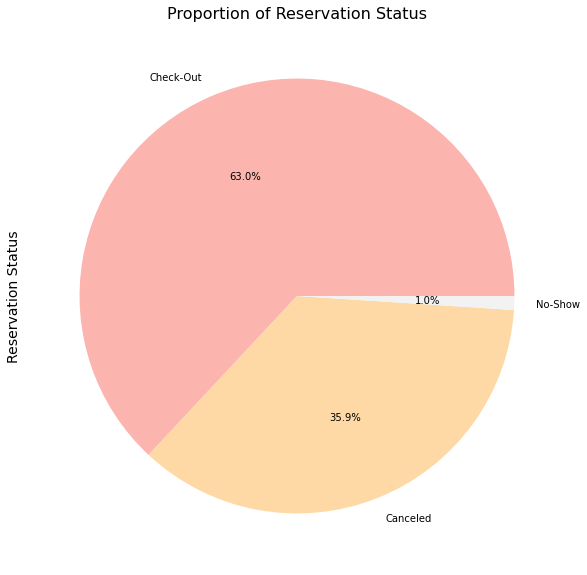

In [17]:
figure = plt.figure(figsize=[10, 10])

train_df['reservation_status'].value_counts().plot.pie(autopct='%3.1f%%',cmap = 'Pastel1')

plt.ylabel(ylabel='Reservation Status', size=14)
plt.title(label='Proportion of Reservation Status', size=16)
plt.show()

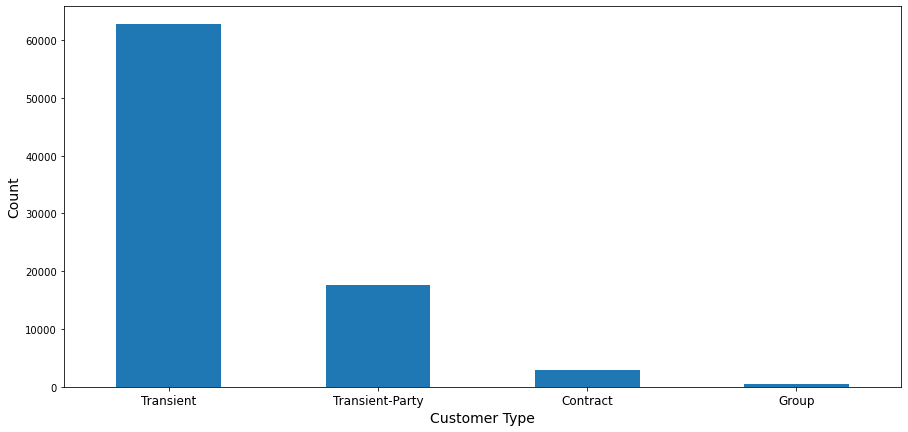

In [18]:
figure = plt.figure(figsize=[15, 7])
train_df['customer_type'].value_counts().plot.bar()
plt.xticks(rotation = 0, size=12)
plt.xlabel(xlabel='Customer Type', size=14)
plt.ylabel(ylabel='Count', size=14)
plt.show()

<AxesSubplot:xlabel='customer_type', ylabel='total_of_special_requests'>

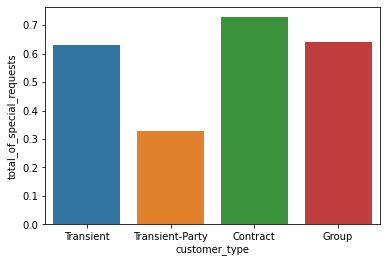

In [19]:
sns.barplot(data=train_df, x='customer_type', y='total_of_special_requests', ci=None)

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


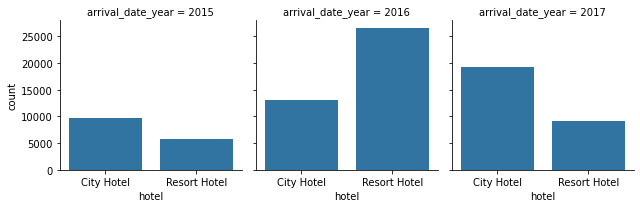

In [20]:
grid = sns.FacetGrid(train_df, col='arrival_date_year')
grid.map(sns.countplot, 'hotel')

<AxesSubplot:xlabel='distribution_channel', ylabel='count'>

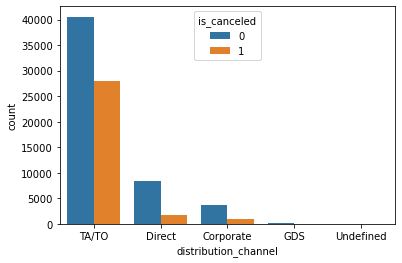

In [21]:
sns.countplot(data=train_df, x='distribution_channel', hue='is_canceled')

<AxesSubplot:xlabel='deposit_type', ylabel='count'>

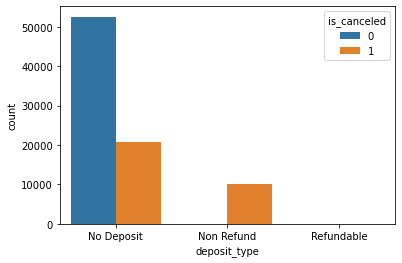

In [22]:
sns.countplot(x="deposit_type", hue="is_canceled",data= train_df)

<AxesSubplot:xlabel='is_repeated_guest', ylabel='count'>

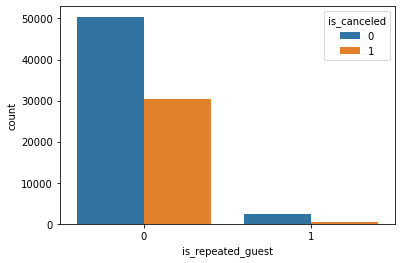

In [23]:
sns.countplot(x="is_repeated_guest", hue="is_canceled",data= train_df)

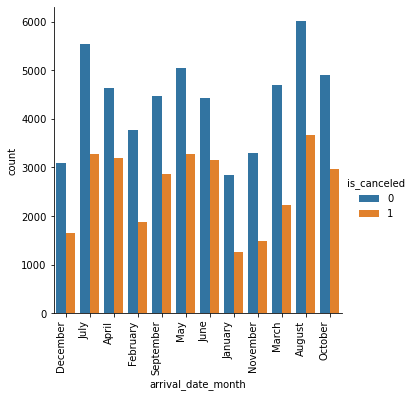

In [24]:
fig= sns.catplot(data = train_df, x='arrival_date_month', hue='is_canceled', kind='count')
fig.set_xticklabels(rotation=90, horizontalalignment='right')

In [37]:
train_df.skew()

C:\Users\sidde\AppData\Local\Temp\ipykernel_16476\2566899487.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.skew()


Index                             -0.002430
hotel                              0.700827
is_canceled                        0.540498
lead_time                          1.348956
arrival_date_year                 -0.232202
arrival_date_month                -0.023826
arrival_date_week_number          -0.005548
arrival_date_day_of_month         -0.001556
stays_in_weekend_nights            1.412022
stays_in_week_nights               2.886225
adults                            16.382613
children                           4.017321
babies                            22.547955
meal                               1.583419
country                           -0.160561
market_segment                    -1.009102
distribution_channel              -1.877535
is_repeated_guest                  5.320842
previous_cancellations            24.223558
previous_bookings_not_canceled    23.960944
reserved_room_type                 1.434204
assigned_room_type                 1.151756
booking_changes                 

hotel


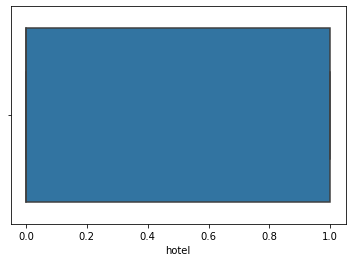

is_canceled


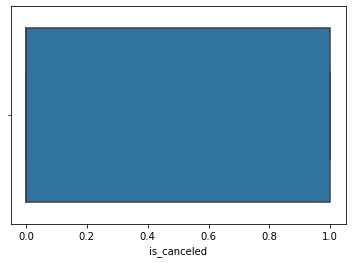

lead_time


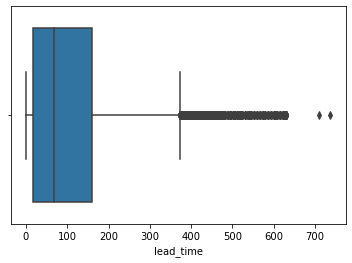

arrival_date_year


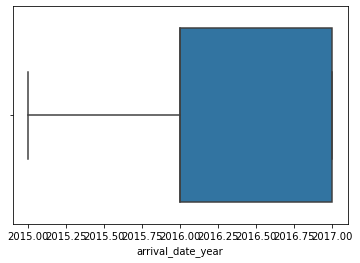

arrival_date_month


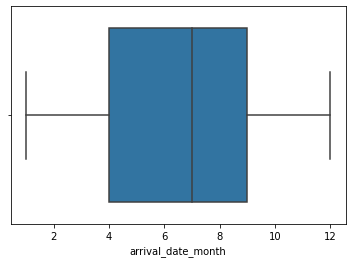

arrival_date_week_number


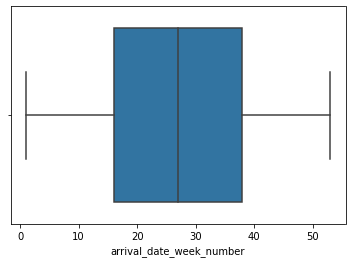

arrival_date_day_of_month


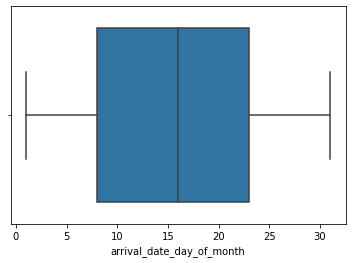

stays_in_weekend_nights


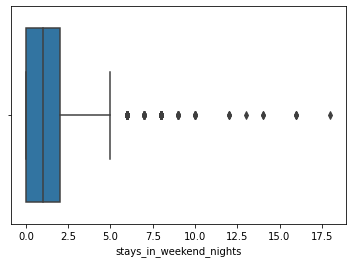

stays_in_week_nights


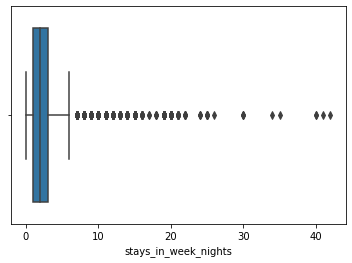

adults


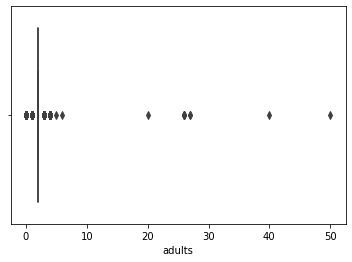

children


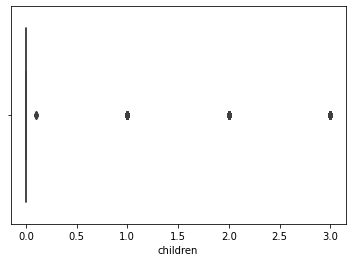

babies


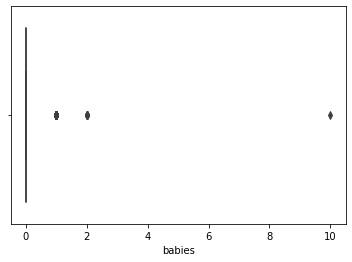

meal


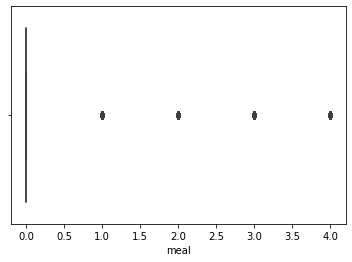

country


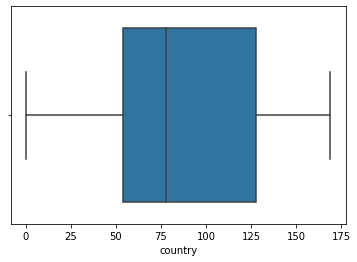

market_segment


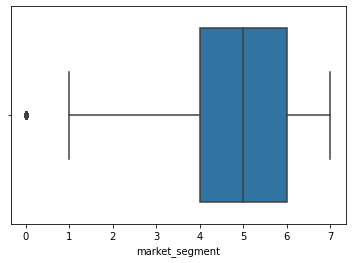

distribution_channel


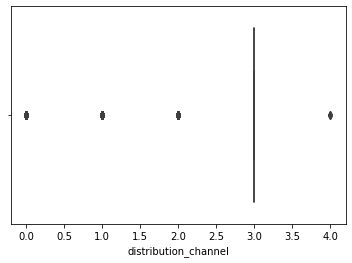

is_repeated_guest


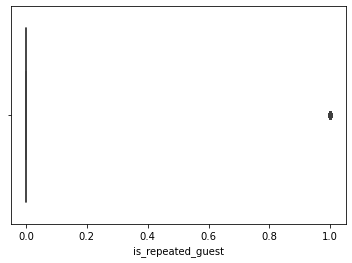

previous_cancellations


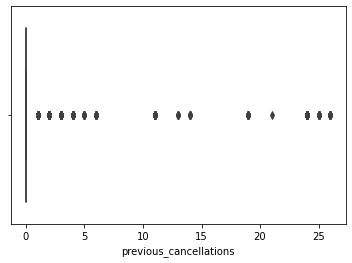

previous_bookings_not_canceled


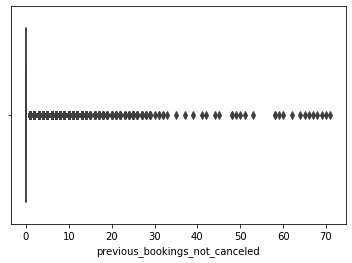

reserved_room_type


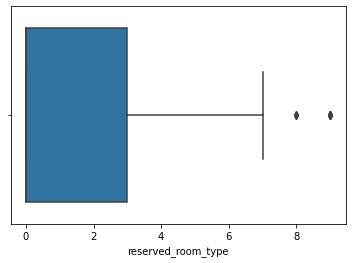

assigned_room_type


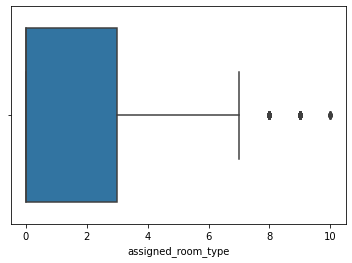

booking_changes


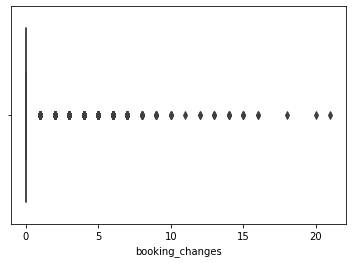

deposit_type


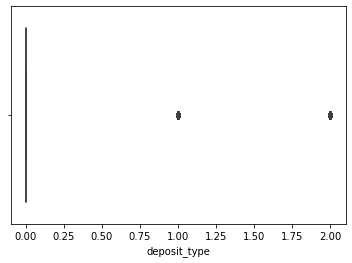

agent


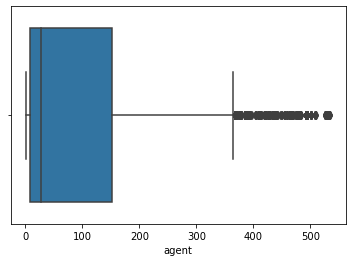

days_in_waiting_list


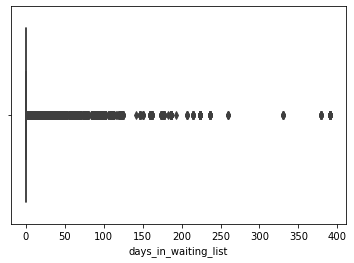

customer_type


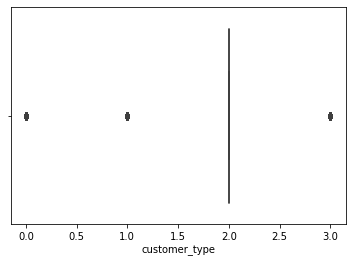

adr


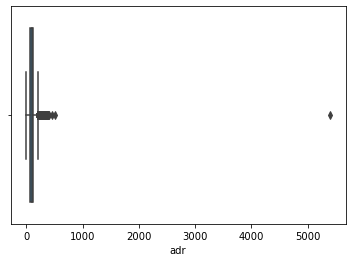

required_car_parking_spaces


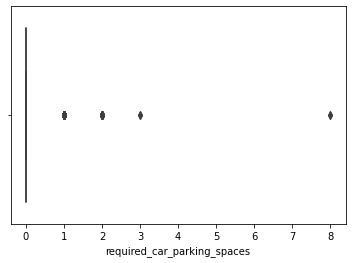

total_of_special_requests


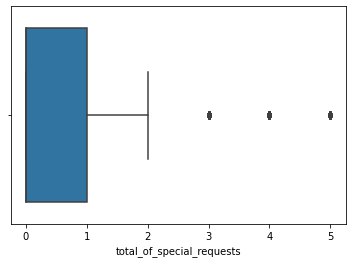

reservation_status


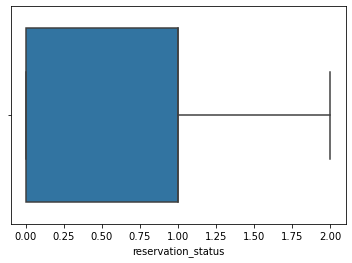

In [38]:
for col in train_df.iloc[:,1:31].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df)
    plt.show()

In [39]:
def Outlier(var):
    for x in var.iloc[:, 1:31].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_train = Outlier(train_df)

hotel


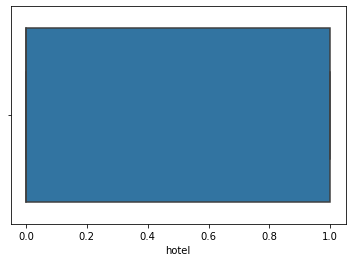

is_canceled


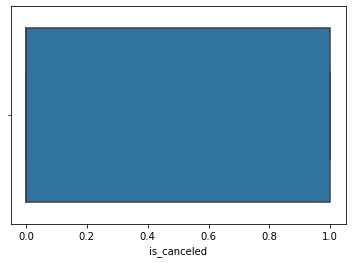

lead_time


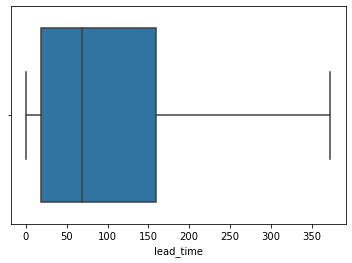

arrival_date_year


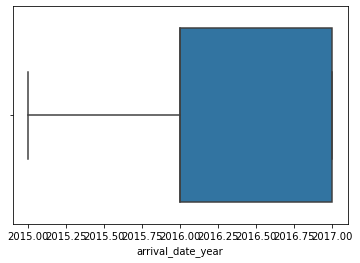

arrival_date_month


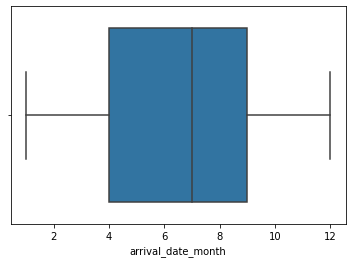

arrival_date_week_number


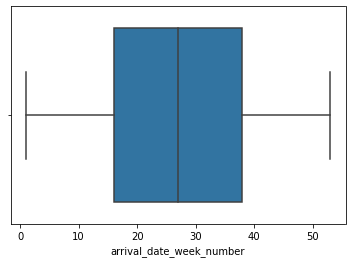

arrival_date_day_of_month


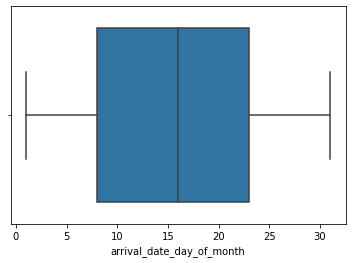

stays_in_weekend_nights


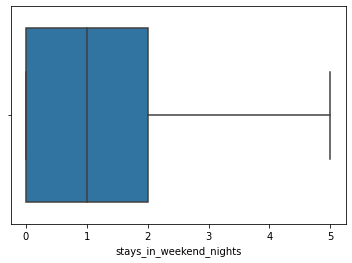

stays_in_week_nights


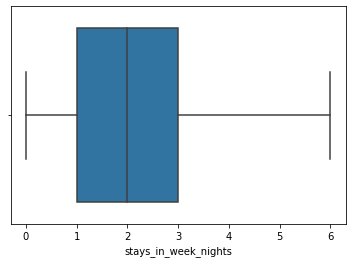

adults


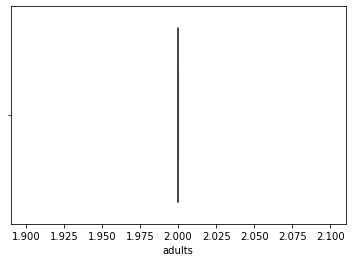

children


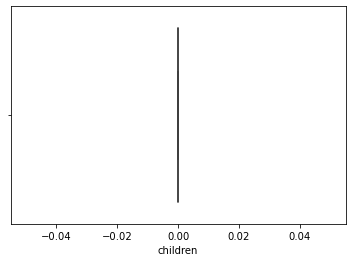

babies


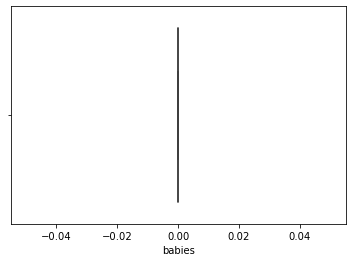

meal


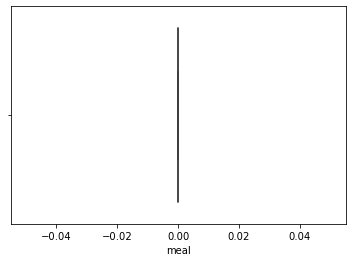

country


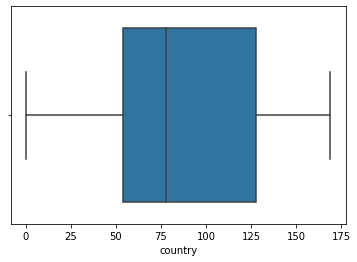

market_segment


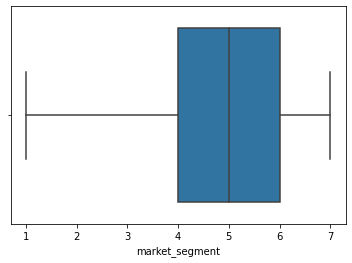

distribution_channel


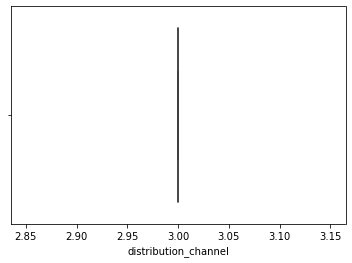

is_repeated_guest


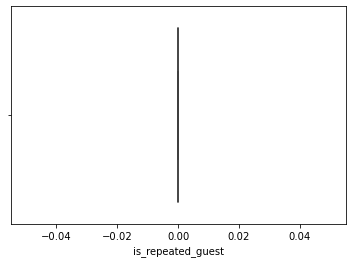

previous_cancellations


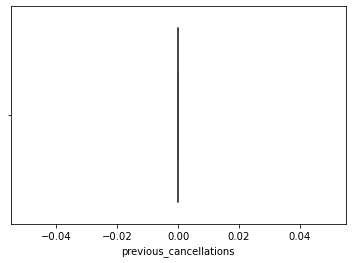

previous_bookings_not_canceled


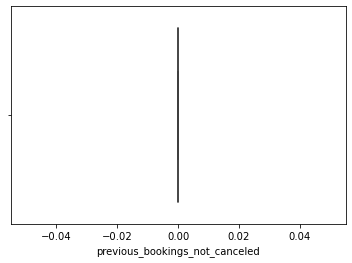

reserved_room_type


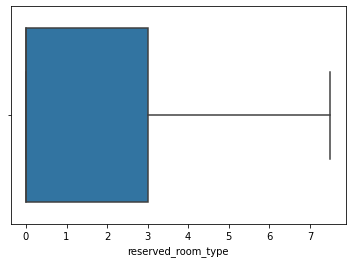

assigned_room_type


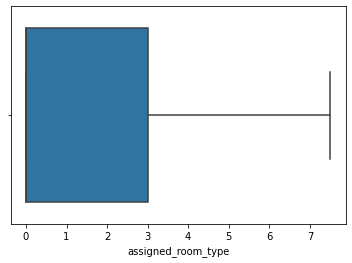

booking_changes


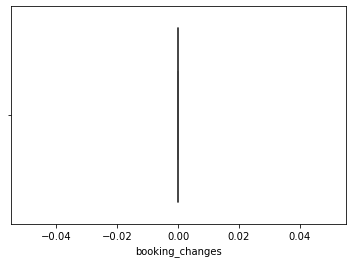

deposit_type


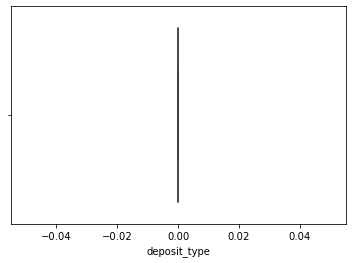

agent


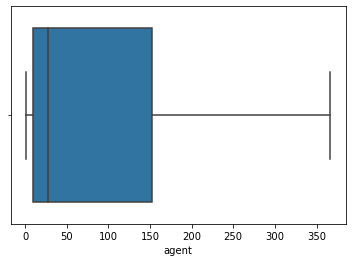

days_in_waiting_list


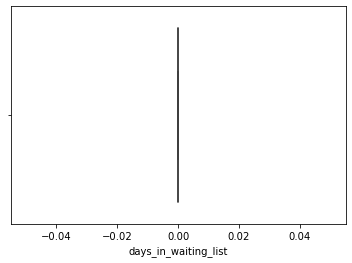

customer_type


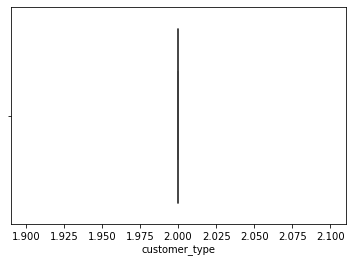

adr


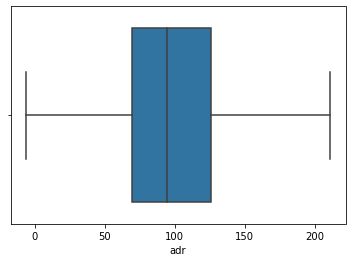

required_car_parking_spaces


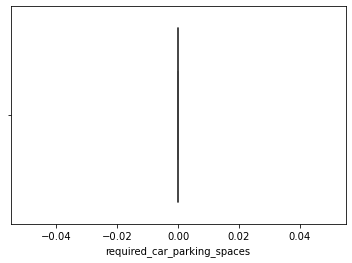

total_of_special_requests


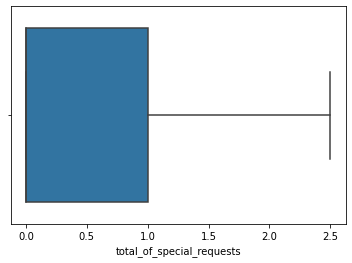

reservation_status


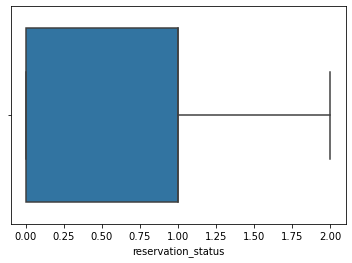

In [40]:
for col in df_train.iloc[:, 1:31].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = df_train)
    plt.show()

In [41]:
df_train.skew()

C:\Users\sidde\AppData\Local\Temp\ipykernel_16476\1035533876.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train.skew()


Index                            -0.002430
hotel                             0.700827
is_canceled                       0.540498
lead_time                         1.057829
arrival_date_year                -0.232202
arrival_date_month               -0.023826
arrival_date_week_number         -0.005548
arrival_date_day_of_month        -0.001556
stays_in_weekend_nights           0.828889
stays_in_week_nights              0.627438
adults                            0.000000
children                          0.000000
babies                            0.000000
meal                              0.000000
country                          -0.160561
market_segment                   -0.972023
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                1.430592
assigned_room_type                1.079568
booking_changes                   0.000000
deposit_typ

In [42]:
df_train.drop('reservation_status_date', axis = 1, inplace = True)

In [126]:
x = df_train.drop(['is_canceled'], axis = 1)
y = df_train['is_canceled']

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 42)

In [129]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(58501, 30)
(25072, 30)
(58501,)
(25072,)


In [130]:
from sklearn.linear_model import LogisticRegression

In [145]:
model = LogisticRegression(max_iter = 1000)

In [146]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [147]:
#for train data
y_pred_train = model.predict(x_train)
y_pred_train

array([1., 1., 1., ..., 0., 0., 0.])

In [148]:
#for test data
y_pred_test = model.predict(x_test)
y_pred_test

array([0., 0., 1., ..., 0., 1., 1.])

In [149]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [150]:
def model_eval(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print('The cm of the Model is :', cm)
    print('The accuracy of the Model is :', accuracy)
    print(class_rep)

In [151]:
model_eval(y_train, y_pred_train)

The cm of the Model is : [[32025  4886]
 [ 6028 15562]]
The accuracy of the Model is : 0.8134390865113417
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85     36911
         1.0       0.76      0.72      0.74     21590

    accuracy                           0.81     58501
   macro avg       0.80      0.79      0.80     58501
weighted avg       0.81      0.81      0.81     58501



In [152]:
model_eval(y_test, y_pred_test)

The cm of the Model is : [[13749  2028]
 [ 2614  6681]]
The accuracy of the Model is : 0.8148532227185705
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86     15777
         1.0       0.77      0.72      0.74      9295

    accuracy                           0.81     25072
   macro avg       0.80      0.80      0.80     25072
weighted avg       0.81      0.81      0.81     25072



In [153]:
from sklearn.metrics import f1_score

In [154]:
f1_score(y_test,y_pred_test)

0.7421684070206621

In [155]:
test_df.head()

,Index,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,30946,Resort Hotel,203,2016,December,49,2,2,5,2,...,4,No Deposit,250.0,0,Transient,66.8,0,0,Check-Out,2016-12-09
1,40207,City Hotel,82,2015,July,29,16,0,3,2,...,0,No Deposit,9.0,0,Transient,76.5,0,0,Canceled,2015-07-16
2,103708,City Hotel,25,2016,December,53,27,0,3,3,...,2,No Deposit,220.0,0,Transient-Party,60.0,0,1,Check-Out,2016-12-30
3,85144,City Hotel,1,2016,March,11,9,0,1,1,...,0,No Deposit,9.0,0,Transient-Party,95.0,0,0,Check-Out,2016-03-10
4,109991,City Hotel,70,2017,April,16,16,2,2,2,...,0,No Deposit,9.0,0,Transient,108.0,0,0,Check-Out,2017-04-20


In [156]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30894 entries, 0 to 30893
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Index                           30894 non-null  int64  
 1   hotel                           30894 non-null  object 
 2   lead_time                       30894 non-null  int64  
 3   arrival_date_year               30894 non-null  int64  
 4   arrival_date_month              30894 non-null  object 
 5   arrival_date_week_number        30894 non-null  int64  
 6   arrival_date_day_of_month       30894 non-null  int64  
 7   stays_in_weekend_nights         30894 non-null  int64  
 8   stays_in_week_nights            30894 non-null  int64  
 9   adults                          30894 non-null  int64  
 10  children                        30894 non-null  float64
 11  babies                          30894 non-null  int64  
 12  meal                            

In [157]:
test_df.describe()

,Index,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,30894.000000,30894.000000,30894.000000,30894.000000,30894.000000,30894.000000,30894.000000,30894.000000,30894.000000,30894.000000,30894.000000,30894.000000,30894.000000,30894.00000,30894.000000,30894.000000,30894.000000,30894.000000,30894.000000
mean,60789.126368,111.993332,2016.155305,27.391921,15.808474,0.978086,2.587396,1.901243,0.112028,0.007283,0.013336,0.075516,0.024244,0.20224,86.979964,2.646371,104.753771,0.052858,0.607788
std,34201.652543,107.722592,0.706519,13.284373,8.768593,0.996907,1.887623,0.458122,0.415028,0.099095,0.114711,0.731903,0.405224,0.61820,110.579100,18.999322,47.184315,0.225340,0.803534
min,3.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32515.500000,26.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,9.000000,0.000000,72.770000,0.000000,0.000000
50%,60515.000000,80.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,14.000000,0.000000,96.300000,0.000000,0.000000
75%,90625.750000,169.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,229.000000,0.000000,128.000000,0.000000,1.000000
max,119389.000000,629.000000,2017.000000,53.000000,31.000000,13.000000,33.000000,4.000000,10.000000,9.000000,1.000000,26.000000,22.000000,17.00000,531.000000,391.000000,437.000000,3.000000,5.000000


In [158]:
test_df.skew()

C:\Users\sidde\AppData\Local\Temp\ipykernel_16476\2591257319.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_df.skew()


Index                             -0.038593
lead_time                          1.293986
arrival_date_year                 -0.229708
arrival_date_week_number          -0.037749
arrival_date_day_of_month         -0.004550
stays_in_weekend_nights            1.045042
stays_in_week_nights               2.390555
adults                            -0.505807
children                           4.169281
babies                            32.015137
is_repeated_guest                  8.485632
previous_cancellations            28.728316
previous_bookings_not_canceled    30.206480
booking_changes                    6.044094
agent                              1.080350
days_in_waiting_list              11.139536
adr                                1.105180
required_car_parking_spaces        4.107029
total_of_special_requests          1.257827
dtype: float64

In [159]:
from sklearn.preprocessing import LabelEncoder

In [160]:
le = LabelEncoder()

In [161]:
test_df['hotel'] = le.fit_transform(test_df['hotel'])
test_df['meal'] = le.fit_transform(test_df['meal'])
test_df['country'] = le.fit_transform(test_df['country'])
test_df['market_segment'] = le.fit_transform(test_df['market_segment'])
test_df['distribution_channel'] = le.fit_transform(test_df['distribution_channel'])
test_df['reserved_room_type'] = le.fit_transform(test_df['reserved_room_type'])
test_df['assigned_room_type'] = le.fit_transform(test_df['assigned_room_type'])
test_df['deposit_type'] = le.fit_transform(test_df['deposit_type'])
test_df['customer_type'] = le.fit_transform(test_df['customer_type'])
test_df['reservation_status'] = le.fit_transform(test_df['reservation_status'])
test_df['reservation_status_date'] = pd.to_datetime(test_df['reservation_status_date'])

In [162]:
month_map = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}
test_df.arrival_date_month = test_df.arrival_date_month.map(month_map).astype(int)

In [163]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30894 entries, 0 to 30893
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Index                           30894 non-null  int64         
 1   hotel                           30894 non-null  int32         
 2   lead_time                       30894 non-null  int64         
 3   arrival_date_year               30894 non-null  int64         
 4   arrival_date_month              30894 non-null  int32         
 5   arrival_date_week_number        30894 non-null  int64         
 6   arrival_date_day_of_month       30894 non-null  int64         
 7   stays_in_weekend_nights         30894 non-null  int64         
 8   stays_in_week_nights            30894 non-null  int64         
 9   adults                          30894 non-null  int64         
 10  children                        30894 non-null  float64       
 11  ba

hotel


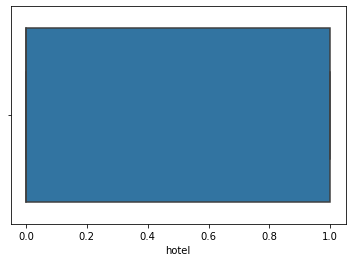

lead_time


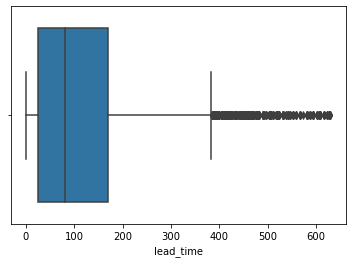

arrival_date_year


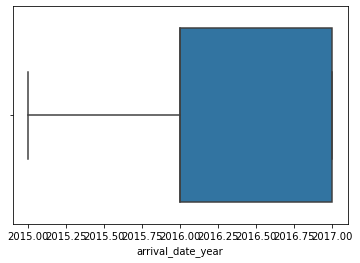

arrival_date_month


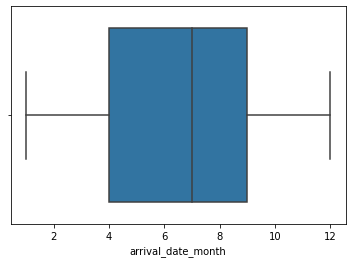

arrival_date_week_number


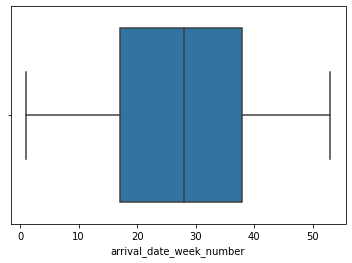

arrival_date_day_of_month


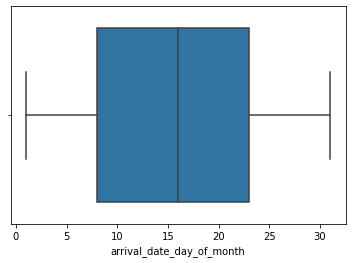

stays_in_weekend_nights


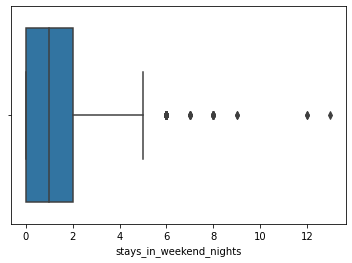

stays_in_week_nights


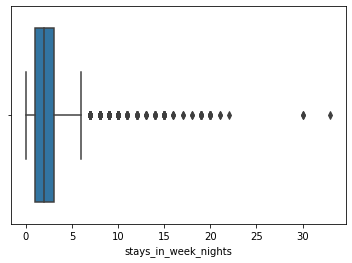

adults


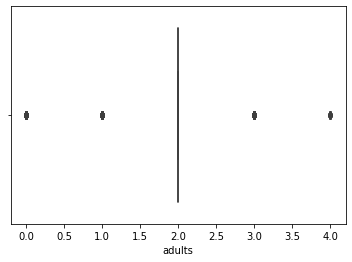

children


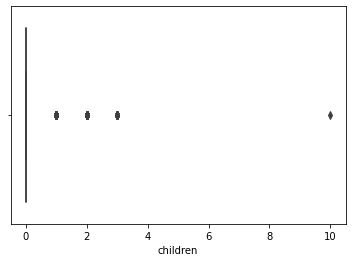

babies


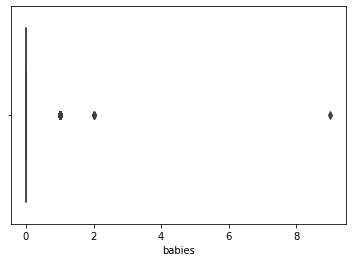

meal


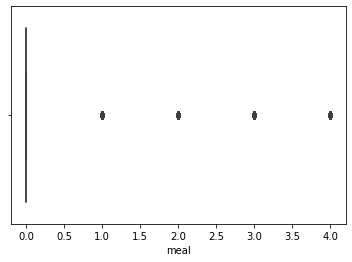

country


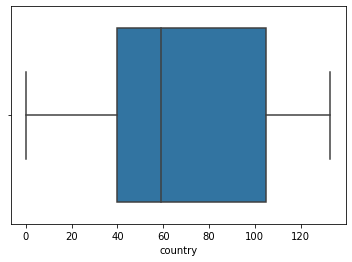

market_segment


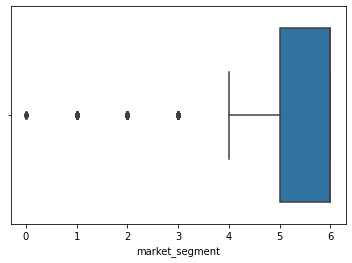

distribution_channel


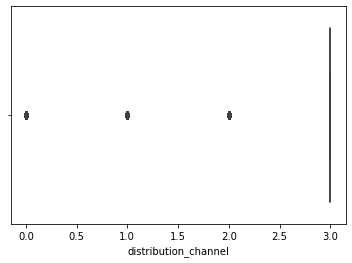

is_repeated_guest


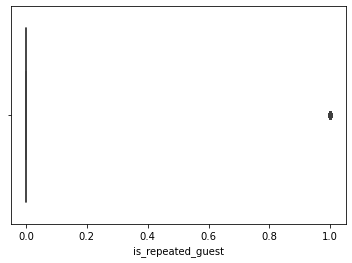

previous_cancellations


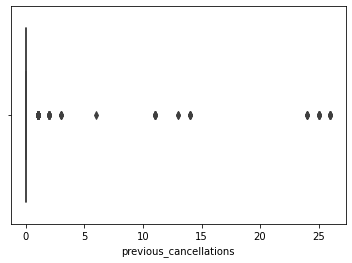

previous_bookings_not_canceled


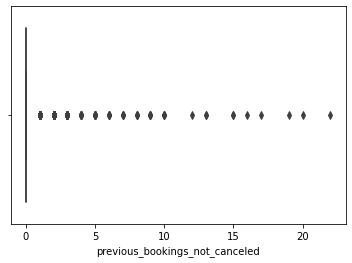

reserved_room_type


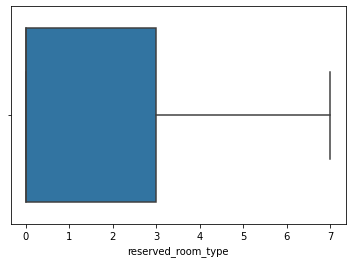

assigned_room_type


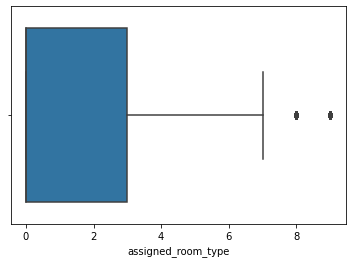

booking_changes


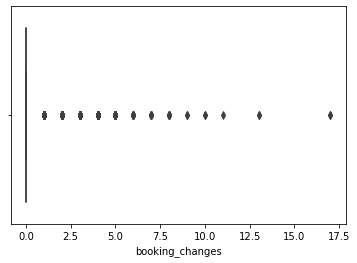

deposit_type


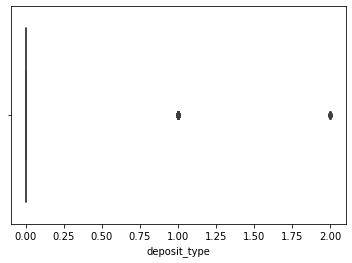

agent


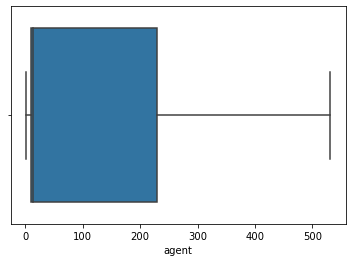

days_in_waiting_list


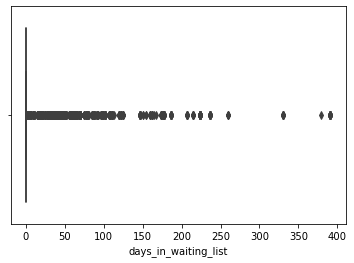

customer_type


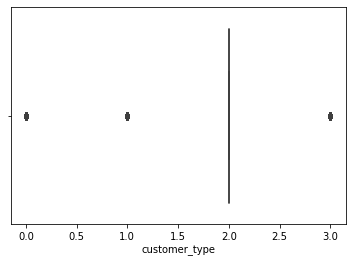

adr


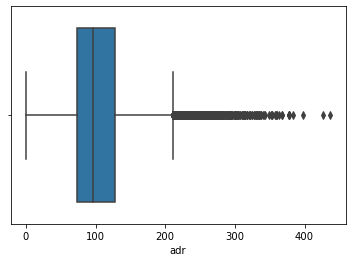

required_car_parking_spaces


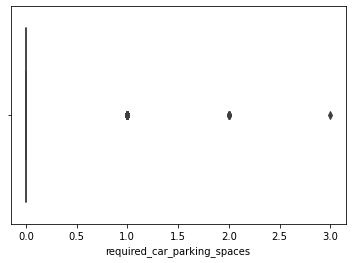

total_of_special_requests


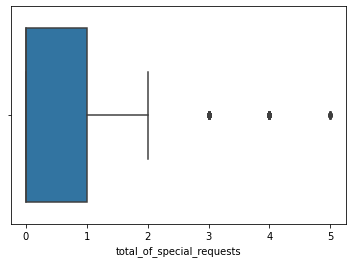

reservation_status


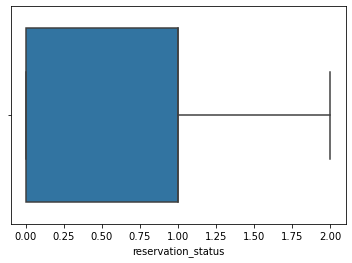

In [164]:
for col in test_df.iloc[:,1:30].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df)
    plt.show()

In [165]:
def Outlier(var):
    for x in var.iloc[:, 1:30].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_test = Outlier(test_df)

hotel


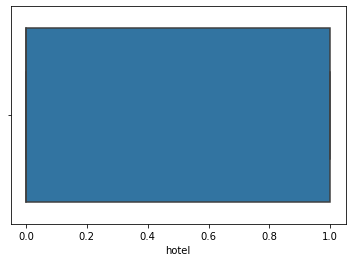

lead_time


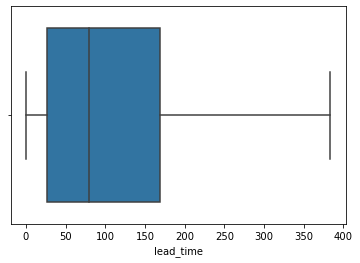

arrival_date_year


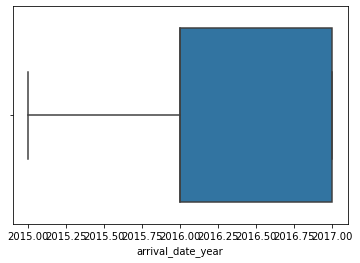

arrival_date_month


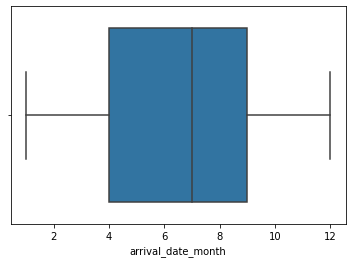

arrival_date_week_number


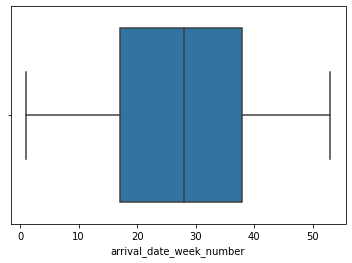

arrival_date_day_of_month


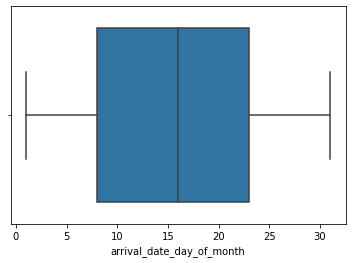

stays_in_weekend_nights


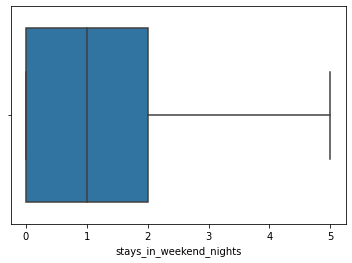

stays_in_week_nights


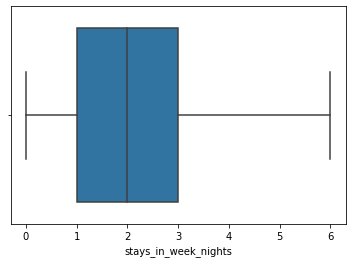

adults


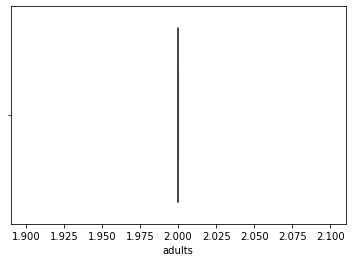

children


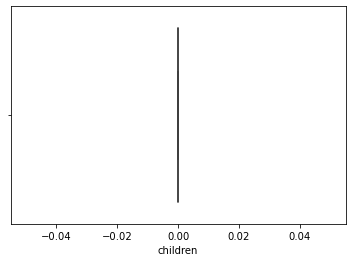

babies


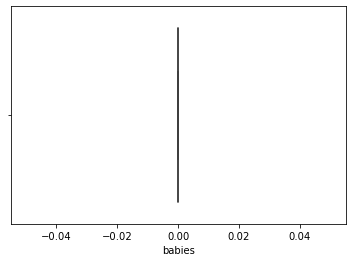

meal


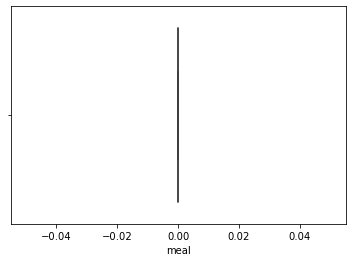

country


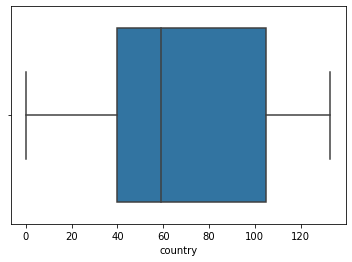

market_segment


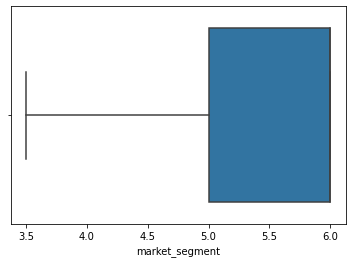

distribution_channel


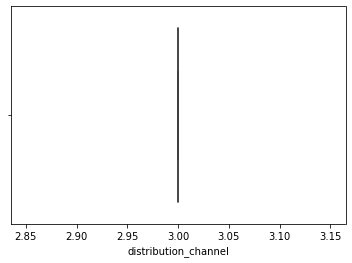

is_repeated_guest


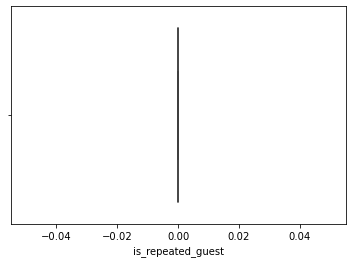

previous_cancellations


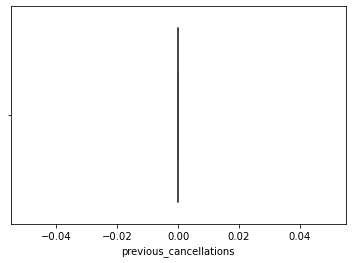

previous_bookings_not_canceled


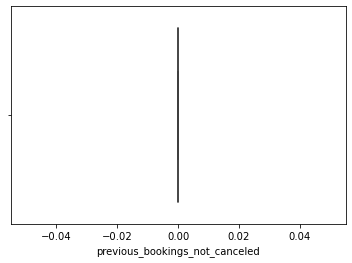

reserved_room_type


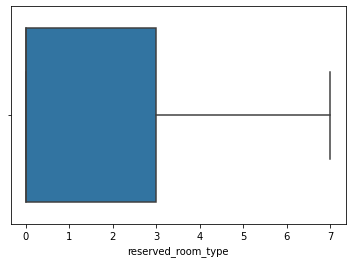

assigned_room_type


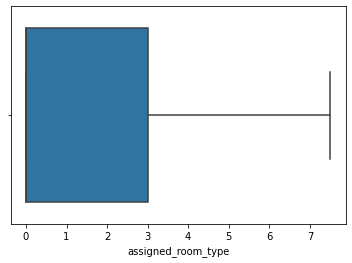

booking_changes


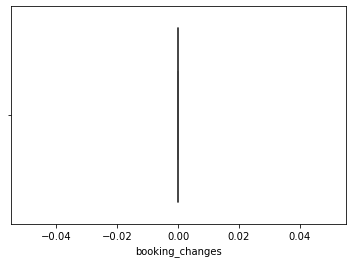

deposit_type


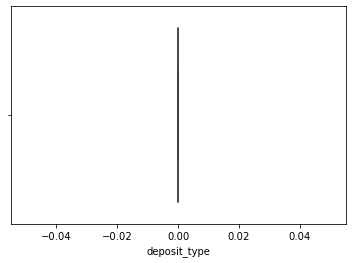

agent


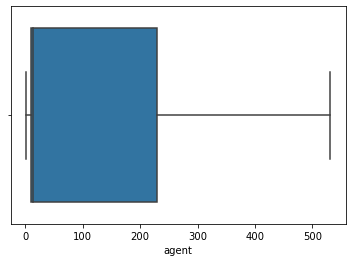

days_in_waiting_list


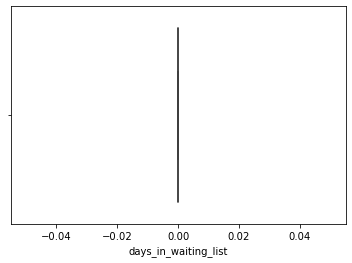

customer_type


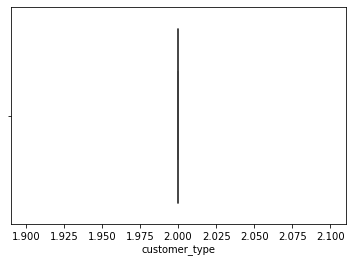

adr


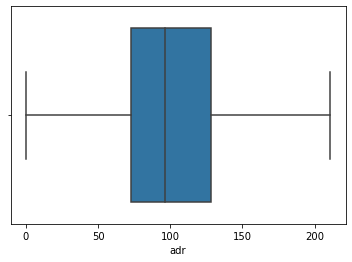

required_car_parking_spaces


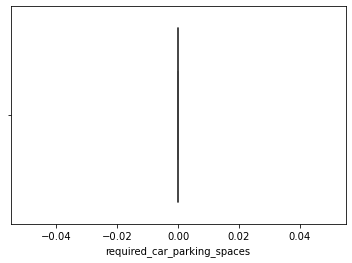

total_of_special_requests


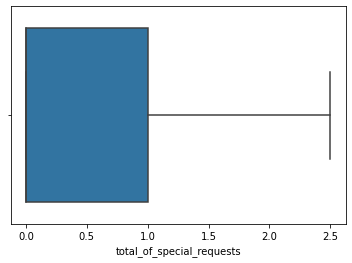

reservation_status


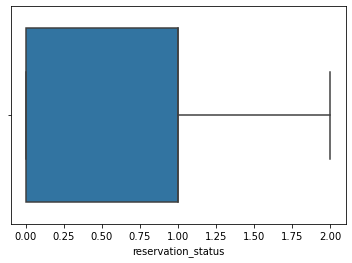

In [166]:
for col in df_test.iloc[:, 1:30].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = df_test)
    plt.show()

In [167]:
df_test.skew()

C:\Users\sidde\AppData\Local\Temp\ipykernel_16476\2005478040.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_test.skew()


Index                            -0.038593
hotel                             0.815489
lead_time                         1.003315
arrival_date_year                -0.229708
arrival_date_month               -0.055266
arrival_date_week_number         -0.037749
arrival_date_day_of_month        -0.004550
stays_in_weekend_nights           0.733492
stays_in_week_nights              0.595338
adults                            0.000000
children                          0.000000
babies                            0.000000
meal                              0.000000
country                          -0.033285
market_segment                   -0.767921
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                1.409846
assigned_room_type                1.111589
booking_changes                   0.000000
deposit_type                      0.000000
agent      

In [168]:
test_1 = df_test.iloc[:, :-1]

In [169]:
predicted_test = model.predict(test_1)

In [170]:
predicted_test

array([0., 1., 0., ..., 0., 0., 1.])

In [171]:
df_test['is_canceled_new'] = predicted_test

In [172]:
df_test['is_canceled_new']=df_test['is_canceled_new'].astype('int')

In [173]:
df_test.to_csv('Submission_hotel_book.csv', index = False, header = False)